In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
import matplotlib.cm as cm
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_regression,make_circles,make_s_curve
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn import decomposition
from factor_analyzer import FactorAnalyzer

Text(0.5, 0.92, '三维空间下100个样本观测点的分布')

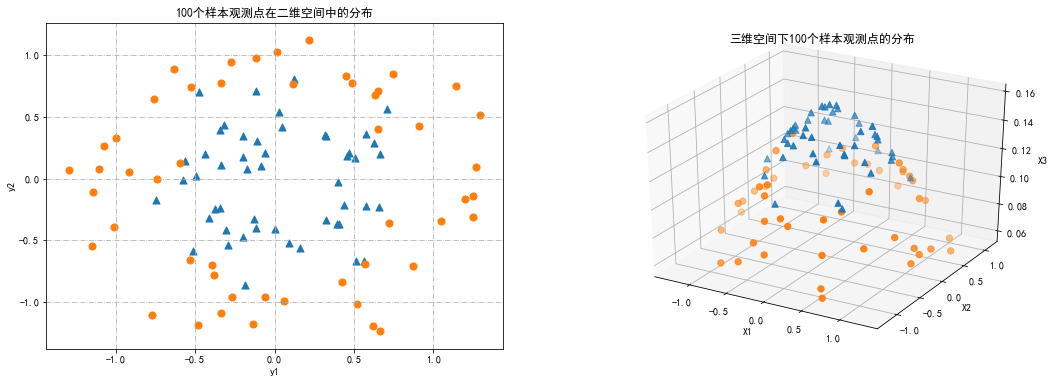

In [2]:
N=100
X,Y=make_circles(n_samples=N,noise=0.2,factor=0.5,random_state=123)
fig = plt.figure(figsize=(18,6))
markers=['^','o']
ax = fig.add_subplot(121)
for k,m in zip([1,0],markers):
    ax.scatter(X[Y==k,0],X[Y==k,1],marker=m,s=50)
ax.set_title("100个样本观测点在二维空间中的分布")
ax.set_xlabel("y1")
ax.set_ylabel("y2")
ax.grid(True,linestyle='-.')
ax = fig.add_subplot(122, projection='3d')
var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])

Z=np.zeros((len(X),))
for i,x in enumerate(X):
    Z[i]=var.pdf(x)
X=np.hstack((X,Z.reshape(len(X),1)))
for k,m in zip([1,0],markers):
    ax.scatter(X[Y==k,0],X[Y==k,1],X[Y==k,2],marker=m,s=40)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('三维空间下100个样本观测点的分布')  

方差贡献率(linear)：[0.52676938 0.47323062]
方差贡献率(rbf)：[0.51813106 0.48186894]


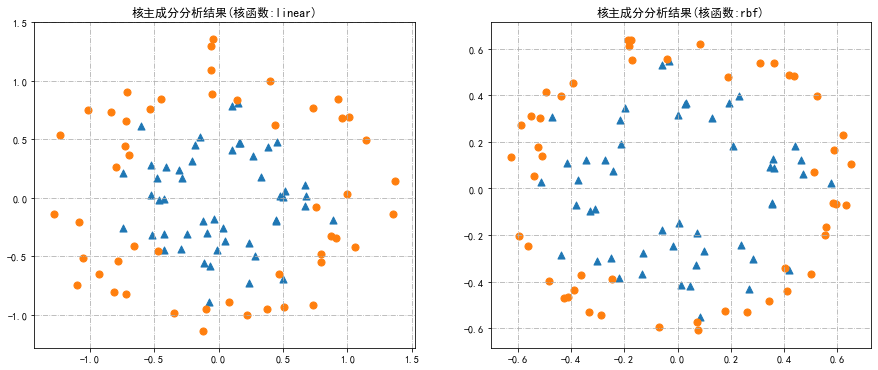

In [3]:
plt.figure(figsize=(15,6))
kernels=['linear','rbf']
for i,kernel in enumerate(kernels):
    kpca=decomposition.KernelPCA(n_components=2,kernel=kernel)
    kpca.fit(X)
    y=kpca.transform(X)
    print('方差贡献率(%s)：%s'%(kernel,kpca.lambdas_/sum(kpca.lambdas_)))
    plt.subplot(1,2,i+1)
    for k,m in zip([1,0],markers):
        plt.scatter(y[Y==k,0],y[Y==k,1],marker=m,s=50)
        plt.grid(True,linestyle='-.')
        plt.title('核主成分分析结果(核函数:%s)'%kernel)


Text(0.5, 0, 'X3')

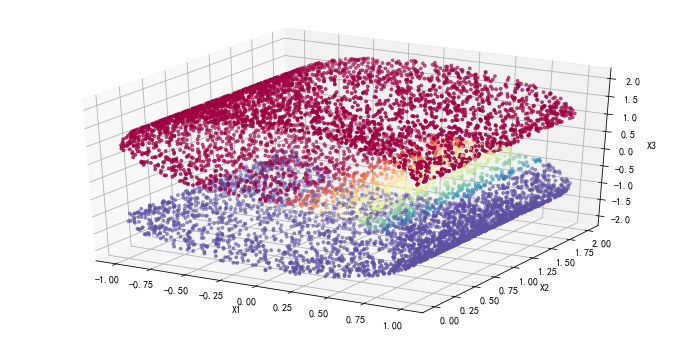

In [4]:
X,t=make_s_curve(n_samples=8000, noise=0, random_state=123)
fig = plt.figure(figsize=(12,6))
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
color=np.array(t)
ax.scatter(X[:,0],X[:,1],X[:,2],s=8,color=plt.cm.Spectral(color))
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")


代码说明：
（1）第1行：利用函数make_s_curve()生成样本量N=8000，包括三个输入变量X_1,X_2,X_3的模拟数据和一个颜色变量t。
（2）第6至9行：可视化模拟数据，绘制三维散点图，如图10.12左图所示，大致呈一个立体的字母S。

Text(0, 0.5, 'X3')

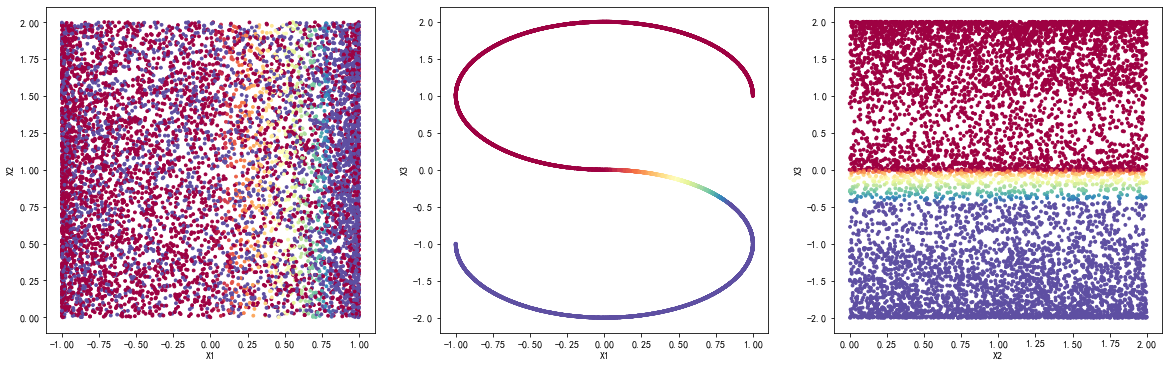

In [5]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
axes[0].scatter(X[:,0],X[:,1],s=8,color=plt.cm.Spectral(color))
axes[0].set_xlabel("X1")
axes[0].set_ylabel("X2")
axes[1].scatter(X[:,0],X[:,2],s=8,color=plt.cm.Spectral(color))
axes[1].set_xlabel("X1")
axes[1].set_ylabel("X3")
axes[2].scatter(X[:,1],X[:,2],s=8,color=plt.cm.Spectral(color))
axes[2].set_xlabel("X2")
axes[2].set_ylabel("X3")


方差贡献率(linear)：[0.79726552 0.20273448]
方差贡献率(rbf)：[0.62781743 0.37218257]
方差贡献率(poly)：[0.76436997 0.23563003]


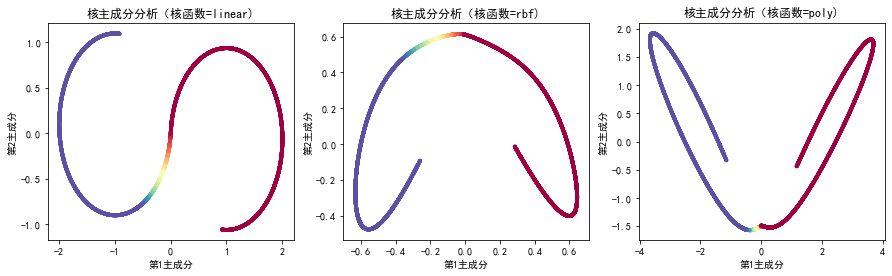

In [6]:
tmp=X[:,[0,2]]
kernels=['linear','rbf','poly']  
plt.figure(figsize=(15,4))
for i,kernel in enumerate(kernels):
    kpca=decomposition.KernelPCA(n_components=2,kernel=kernel)
    kpca.fit(tmp)
    y=kpca.transform(tmp)
    plt.subplot(1,3,i+1)
    plt.scatter(y[:,0],y[:,1],s=8,color=plt.cm.Spectral(color))
    plt.title("核主成分分析（核函数=%s)"%kernel)
    plt.xlabel("第1主成分")
    plt.ylabel("第2主成分")    
    print('方差贡献率(%s)：%s'%(kernel,kpca.lambdas_/sum(kpca.lambdas_)))

代码说明：
（1）第1行：指定核主成分分析的数据对象为X_1,X_3。
（2）第2行：指定核主成分分析的核函数依次为线性核函数，径向基核函数以及多项式核函数。
（3）第4至11行：利用for循环分别基于不同的核函数，进行核主成分分析。可视化核主成分分析结果。计算各个主成分的方差贡献率。


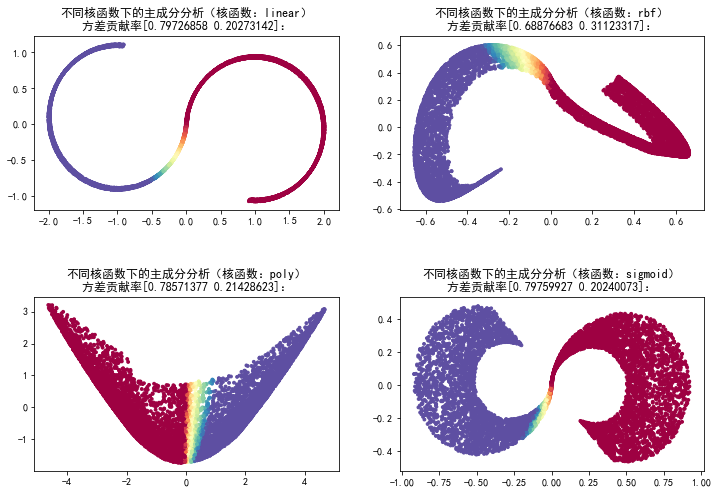

In [7]:
plt.figure(figsize=(12,8))
kernels=['linear','rbf','poly','sigmoid']  
for i,kernel in enumerate(kernels):
    kpca=decomposition.KernelPCA(n_components=2,kernel=kernel)
    kpca.fit(X)
    y=kpca.transform(X)
    plt.subplot(2,2,i+1)
    plt.scatter(y[:,0],y[:,1],s=8,color=plt.cm.Spectral(color))
    plt.title("不同核函数下的主成分分析（核函数：%s）\n方差贡献率%s："%(kernel,kpca.lambdas_/sum(kpca.lambdas_)))
    plt.subplots_adjust(hspace=0.5)